## Linear Regression with Pytorch using CPU and GPU

In [1]:
import numpy as np

### Build a Data Set (Training Data Set)

In [2]:
x = [i for i in range(18)]
x
x_train = np.array(x, dtype=np.float32)
x_train = x_train.reshape(-1,1)
print(x_train)
print(x_train.shape)

[[ 0.]
 [ 1.]
 [ 2.]
 [ 3.]
 [ 4.]
 [ 5.]
 [ 6.]
 [ 7.]
 [ 8.]
 [ 9.]
 [10.]
 [11.]
 [12.]
 [13.]
 [14.]
 [15.]
 [16.]
 [17.]]
(18, 1)


The target funtion is **y = 2x + 1**

In [3]:
y_train = [2*i + 1 for i in x]
y_train = np.array(y_train, dtype=np.float32)
y_train = y_train.reshape(-1,1)
print(y_train)
print(y_train.shape)

[[ 1.]
 [ 3.]
 [ 5.]
 [ 7.]
 [ 9.]
 [11.]
 [13.]
 [15.]
 [17.]
 [19.]
 [21.]
 [23.]
 [25.]
 [27.]
 [29.]
 [31.]
 [33.]
 [35.]]
(18, 1)


### Create a Model Class

In [4]:
import torch
import torch.nn as nn
from torch.autograd import Variable

nn.Linear Applies a linear transformation to the incoming data -> y = xA^T + b

- torch.nn.Linear(in_features, out_features, bias=True)

- in_features – size of each input sample
- out_features – size of each output sample
- bias – If set to False, the layer will not learn an additive bias. Default: True

In [5]:
class LinearRegressionModel(nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_size, input_size)
    
    def forward(self, x):
        out = self.linear(x)
        return out

- input x and output y have 1 dimention

In [6]:
model = LinearRegressionModel(1,1)

In [7]:
# move the model to GPU
if torch.cuda.is_available():
    model.cuda()

In [8]:
loss_function = nn.MSELoss()

In [9]:
learning_rate = 0.01

In [10]:
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [11]:
### Training the Model

In [12]:
# increasing epoch give us better accuracy
#epochs = 3800
epochs = 1800
for epoch in range(epochs):
    if torch.cuda.is_available():
        #move torch tensors to the GPU
        inputs = Variable(torch.from_numpy(x_train).cuda())
        labels = Variable(torch.from_numpy(y_train).cuda())
    else:
        inputs = Variable(torch.from_numpy(x_train))
        labels = Variable(torch.from_numpy(y_train))
    
    #clear gradient for every parameter from the previous epoch
    optimizer.zero_grad()
    
    #get predictions
    predictions = model(inputs)
    
    #calculate the loss
    loss = loss_function (predictions, labels)
    
    #calculate the gradients
    loss.backward()
    
    #update the parameters
    optimizer.step()
    
    #loss gets lower every epoch 
    print(str(epoch) + " , " + str(loss.item()))

0 , 242.27093505859375
1 , 241.27511596679688
2 , 240.2835235595703
3 , 239.2960662841797
4 , 238.31253051757812
5 , 237.3330078125
6 , 236.35752868652344
7 , 235.38612365722656
8 , 234.41873168945312
9 , 233.45535278320312
10 , 232.49581909179688
11 , 231.54031372070312
12 , 230.5886993408203
13 , 229.64100646972656
14 , 228.697265625
15 , 227.75729370117188
16 , 226.82125854492188
17 , 225.88902282714844
18 , 224.96075439453125
19 , 224.03619384765625
20 , 223.1154327392578
21 , 222.19842529296875
22 , 221.28524780273438
23 , 220.37582397460938
24 , 219.4701690673828
25 , 218.56829833984375
26 , 217.6700439453125
27 , 216.77554321289062
28 , 215.88462829589844
29 , 214.9974822998047
30 , 214.1139373779297
31 , 213.2340545654297
32 , 212.35777282714844
33 , 211.48504638671875
34 , 210.61599731445312
35 , 209.75039672851562
36 , 208.8885040283203
37 , 208.0301055908203
38 , 207.17520141601562
39 , 206.3238983154297
40 , 205.47604370117188
41 , 204.63165283203125
42 , 203.79071044921875

350 , 57.35361862182617
351 , 57.11804962158203
352 , 56.88344192504883
353 , 56.649803161621094
354 , 56.417152404785156
355 , 56.18543243408203
356 , 55.95469284057617
357 , 55.72488784790039
358 , 55.496028900146484
359 , 55.26808166503906
360 , 55.04106521606445
361 , 54.814979553222656
362 , 54.58985137939453
363 , 54.36564254760742
364 , 54.142333984375
365 , 53.91994094848633
366 , 53.698482513427734
367 , 53.47793960571289
368 , 53.25828170776367
369 , 53.039520263671875
370 , 52.8216552734375
371 , 52.60467529296875
372 , 52.38864517211914
373 , 52.17348861694336
374 , 51.95919418334961
375 , 51.74577713012695
376 , 51.53322982788086
377 , 51.32159423828125
378 , 51.11079406738281
379 , 50.900856018066406
380 , 50.69176483154297
381 , 50.483558654785156
382 , 50.27621078491211
383 , 50.06973648071289
384 , 49.864112854003906
385 , 49.65932846069336
386 , 49.45534896850586
387 , 49.25223922729492
388 , 49.04994583129883
389 , 48.84847640991211
390 , 48.64786148071289
391 , 48.4

785 , 9.573620796203613
786 , 9.53429889678955
787 , 9.49514102935791
788 , 9.456148147583008
789 , 9.417316436767578
790 , 9.378639221191406
791 , 9.340128898620605
792 , 9.301774978637695
793 , 9.263569831848145
794 , 9.22552490234375
795 , 9.187642097473145
796 , 9.149910926818848
797 , 9.11233901977539
798 , 9.07491683959961
799 , 9.037647247314453
800 , 9.000530242919922
801 , 8.963563919067383
802 , 8.926756858825684
803 , 8.890098571777344
804 , 8.853588104248047
805 , 8.81722640991211
806 , 8.781010627746582
807 , 8.74494743347168
808 , 8.70903491973877
809 , 8.673270225524902
810 , 8.637653350830078
811 , 8.602177619934082
812 , 8.566852569580078
813 , 8.53166675567627
814 , 8.496631622314453
815 , 8.461734771728516
816 , 8.426982879638672
817 , 8.392374038696289
818 , 8.357904434204102
819 , 8.32358455657959
820 , 8.289401054382324
821 , 8.255364418029785
822 , 8.221457481384277
823 , 8.187691688537598
824 , 8.154062271118164
825 , 8.120566368103027
826 , 8.087217330932617
82

1280 , 1.2484166622161865
1281 , 1.2432907819747925
1282 , 1.2381848096847534
1283 , 1.2331013679504395
1284 , 1.2280393838882446
1285 , 1.2229938507080078
1286 , 1.2179698944091797
1287 , 1.2129666805267334
1288 , 1.2079863548278809
1289 , 1.2030274868011475
1290 , 1.1980862617492676
1291 , 1.193164348602295
1292 , 1.1882634162902832
1293 , 1.1833847761154175
1294 , 1.1785259246826172
1295 , 1.1736862659454346
1296 , 1.1688663959503174
1297 , 1.1640626192092896
1298 , 1.1592806577682495
1299 , 1.1545212268829346
1300 , 1.1497806310653687
1301 , 1.1450589895248413
1302 , 1.140356421470642
1303 , 1.1356711387634277
1304 , 1.1310060024261475
1305 , 1.1263631582260132
1306 , 1.1217371225357056
1307 , 1.1171278953552246
1308 , 1.112539529800415
1309 , 1.1079717874526978
1310 , 1.1034221649169922
1311 , 1.0988922119140625
1312 , 1.0943787097930908
1313 , 1.08988618850708
1314 , 1.0854113101959229
1315 , 1.080955982208252
1316 , 1.076515793800354
1317 , 1.0720967054367065
1318 , 1.0676945447

1655 , 0.266757607460022
1656 , 0.26566171646118164
1657 , 0.26457130908966064
1658 , 0.2634853422641754
1659 , 0.26240360736846924
1660 , 0.2613256573677063
1661 , 0.2602529525756836
1662 , 0.2591846287250519
1663 , 0.2581208050251007
1664 , 0.25706106424331665
1665 , 0.2560063898563385
1666 , 0.2549542486667633
1667 , 0.25390833616256714
1668 , 0.25286632776260376
1669 , 0.2518284320831299
1670 , 0.25079384446144104
1671 , 0.24976396560668945
1672 , 0.24873831868171692
1673 , 0.24771748483181
1674 , 0.2466999888420105
1675 , 0.24568703770637512
1676 , 0.24467767775058746
1677 , 0.24367205798625946
1678 , 0.24267074465751648
1679 , 0.24167411029338837
1680 , 0.24068069458007812
1681 , 0.23969200253486633
1682 , 0.23870716989040375
1683 , 0.2377270609140396
1684 , 0.23675084114074707
1685 , 0.23577731847763062
1686 , 0.2348082810640335
1687 , 0.23384465277194977
1688 , 0.23288430273532867
1689 , 0.23192712664604187
1690 , 0.23097501695156097
1691 , 0.23002666234970093
1692 , 0.22908152

In [13]:
#move the model back to CPU
model.cpu()

LinearRegressionModel(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)

In [14]:
predictions = model(Variable(torch.from_numpy(x_train))).data
predictions = np.array(predictions, dtype=np.float32)
predictions

array([[ 0.9966774],
       [ 2.958476 ],
       [ 4.9202747],
       [ 6.882073 ],
       [ 8.843872 ],
       [10.80567  ],
       [12.767468 ],
       [14.729267 ],
       [16.691067 ],
       [18.652864 ],
       [20.614662 ],
       [22.576462 ],
       [24.53826  ],
       [26.50006  ],
       [28.461857 ],
       [30.423656 ],
       [32.385452 ],
       [34.34725  ]], dtype=float32)

In [15]:
labels

tensor([[ 1.],
        [ 3.],
        [ 5.],
        [ 7.],
        [ 9.],
        [11.],
        [13.],
        [15.],
        [17.],
        [19.],
        [21.],
        [23.],
        [25.],
        [27.],
        [29.],
        [31.],
        [33.],
        [35.]], device='cuda:0')

### Plot Predictions vs The Ground Truth (Labels)

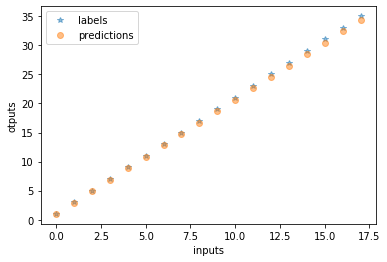

In [16]:
import matplotlib.pyplot as plt

plt.clf()
plt.plot(x_train, y_train, '*', label='labels', alpha=0.5)
plt.plot(x_train, predictions, 'o', label='predictions', alpha=0.5)
plt.xlabel("inputs")
plt.ylabel("otputs")
plt.legend(loc='best')
plt.show()

In [17]:
torch.save(model.state_dict(), "linear_regression_model.pkl")

In [18]:
# model.load_state_dict(torch.load("linear_regression_model.pkl"))